### Create and implement a basic neuron model

In [4]:
import numpy as np

class Neuron:
    def __init__(self,input_size,activation_function='sigmoid'):
        self.weights=np.random.rand(input_size)
        self.bias=np.random.rand()

        if activation_function=='sigmoid':
            self.activation_function=self.sigmoid
            self.activation_derivative=self.sigmoid_derivative
        elif activation_function=='step':
            self.activation_function=self.step_function
            self.activation_derivative=self.step_derivative
        else:
            raise ValueError("Unknown activation function. Please choose either sigmoid or step function")
        
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    def sigmoid_derivative(self,x):
        return x*(1-x)
    def step_function(self,x):
        if x>=0:
            return 1
        else:
            return 0
    def step_derivative(self,x):
        return 0

    def forward(self,inputs):
        weighted_sum=np.dot(inputs,self.weights)+self.bias
        output=self.activation_function(weighted_sum)
        return output

input_size=5
neuron=Neuron(input_size,activation_function='sigmoid')
inputs=np.random.rand(input_size)
output=neuron.forward(inputs)

print(f"Inputs : {inputs}")
print(f"Weights : {neuron.weights}")
print(f"Biases : {neuron.bias}")
print(f"Output : {output}")

Inputs : [0.09854606 0.81364504 0.2393049  0.69482893 0.06748017]
Weights : [0.06681782 0.20674037 0.11527595 0.33388839 0.69722282]
Biases : 0.58778558871897
Output : 0.7444473398841132


### Implement a diverse set of activation functions

Epoch 0, Loss: 0.28318958906443975
Epoch 1000, Loss: 0.2511397143814502
Epoch 2000, Loss: 0.25066250355019487
Epoch 3000, Loss: 0.25024359708410093
Epoch 4000, Loss: 0.24984909904873367
Epoch 5000, Loss: 0.2494600632875026
Epoch 6000, Loss: 0.24905796930121282
Epoch 7000, Loss: 0.2486234169721041
Epoch 8000, Loss: 0.24813475633872903
Epoch 9000, Loss: 0.2475665964491037
Epoch 0, Loss: 0.32226166596191774
Epoch 1000, Loss: 0.23607465348875356
Epoch 2000, Loss: 0.22571014203357392
Epoch 3000, Loss: 0.21466158164475752
Epoch 4000, Loss: 0.1985252211103719
Epoch 5000, Loss: 0.1724581784372169
Epoch 6000, Loss: 0.14087497829754747
Epoch 7000, Loss: 0.1151884023527486
Epoch 8000, Loss: 0.09860126015821963
Epoch 9000, Loss: 0.08846806722298366
Epoch 0, Loss: 0.3554116985980176
Epoch 1000, Loss: 0.2500396268535296
Epoch 2000, Loss: 0.25001326268300533
Epoch 3000, Loss: 0.25000445069337257
Epoch 4000, Loss: 0.25000149468759014
Epoch 5000, Loss: 0.25000050208086966
Epoch 6000, Loss: 0.2500001686

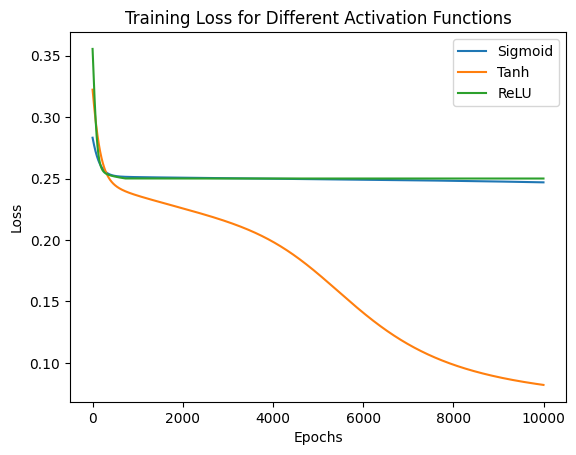

In [6]:
import numpy as np
import matplotlib.pyplot as plt


class Perceptron:
    def _init_(self, input_size, learning_rate=0.01, max_epochs=1000):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.losses = []

    def step_function(self, weighted_sum):
        return 1 if weighted_sum >= 0 else 0

    def sigmoid_function(self, weighted_sum):
        return 1 / (1 + np.exp(-weighted_sum))

    def tanh_function(self, weighted_sum):
        return np.tanh(weighted_sum)

    def relu_function(self, weighted_sum):
        return max(0, weighted_sum)

    def predict(self, inputs, activation_function):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return activation_function(weighted_sum)

    def calculate_loss(self, predictions, labels):
        return np.sum((predictions - labels) ** 2) / 2

    def train(self, training_data, labels, activation_function):
        for epoch in range(self.max_epochs):
            errors = 0
            epoch_loss = 0
            for inputs, label in zip(training_data, labels):
                prediction = self.predict(inputs, activation_function)
                update = self.learning_rate * (label - prediction)
                self.weights += update * inputs
                self.bias += update
                errors += int(update != 0)
                epoch_loss += self.calculate_loss(prediction, label)

            self.losses.append(epoch_loss)

            if errors == 0:
                print(f"Training converged after {epoch + 1} epochs.")
                break

        if errors > 0:
            print(f"Training did not converge after {self.max_epochs} epochs.")


def plot_loss_vs_epochs(perceptron, title):
    plt.plot(range(1, len(perceptron.losses) + 1), perceptron.losses)
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()


# Example usage
input_size = 2
perceptron = Perceptron(input_size)

training_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 0, 0, 1])

# Train and plot loss for step function
perceptron.train(training_data, labels, perceptron.step_function)
plot_loss_vs_epochs(perceptron, "Loss vs Epochs - Step Function")

# Train and plot loss for sigmoid function
perceptron = Perceptron(input_size)
perceptron.train(training_data, labels, perceptron.sigmoid_function)
plot_loss_vs_epochs(perceptron, "Loss vs Epochs - Sigmoid Function")

# Train and plot loss for tanh function
perceptron = Perceptron(input_size)
perceptron.train(training_data, labels, perceptron.tanh_function)
plot_loss_vs_epochs(perceptron, "Loss vs Epochs - Tanh Function")

# Train and plot loss for relu function
perceptron = Perceptron(input_size)
perceptron.train(training_data, labels, perceptron.relu_function)
plot_loss_vs_epochs(perceptron, "Loss vs Epochs - ReLU Function")

In [ ]:
import numpy as np

class Neuron:
    def __init__(self,input_size,activation_function='sigmoid'):
        self.weights=np.random.rand(input_size)
        self.bias=np.random.rand()

        if activation_function=='sigmoid':
            self.activation_function=self.sigmoid
            self.activation_derivative=self.sigmoid_derivative
        elif activation_function=='step':
            self.activation_function=self.step_function
            self.activation_derivative=self.step_derivative
        else:
            raise ValueError("Unknown activation function. Please choose either sigmoid or step function")
        
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    def sigmoid_derivative(self,x):
        return x*(1-x)
    def step_function(self,x):
        if x>=0:
            return 1
        else:
            return 0
    def step_derivative(self,x):
        return 0

    def forward(self,inputs):
        weighted_sum=np.dot(inputs,self.weights)+self.bias
        output=self.activation_function(weighted_sum)
        return output

input_size=5
neuron=Neuron(input_size,activation_function='sigmoid')
inputs=np.random.rand(input_size)
output=neuron.forward(inputs)

print(f"Inputs : {inputs}")
print(f"Weights : {neuron.weights}")
print(f"Biases : {neuron.bias}")
print(f"Output : {output}")

Inputs : [0.09854606 0.81364504 0.2393049  0.69482893 0.06748017]
Weights : [0.06681782 0.20674037 0.11527595 0.33388839 0.69722282]
Biases : 0.58778558871897
Output : 0.7444473398841132


### Develop and implement a program to execute the perceptron learning algorithm(single layer, binary classification)

In [8]:
import numpy as np

class Perceptron:
    def __init__(self,input_size,learning_rate=0.01,max_epochs=1000):
        self.weights=np.random.rand(input_size)
        self.bias=np.random.rand()
        self.learning_rate=learning_rate
        self.max_epochs=max_epochs

    def predict(self,inputs):
        weighted_sum=np.dot(inputs,self.weights)+self.bias
        return 1 if weighted_sum>=0 else 0
    
    def train(self,training_data,labels):
        for i in range(self.max_epochs):
            errors=0
            for inputs,label in zip(training_data,labels):
                prediction=self.predict(inputs)
                update=self.learning_rate*(label-prediction)
                self.weights+=update*inputs
                self.bias+=update
                errors+=int(update!=0)
            if errors==0:
                print(f"Training converged after {i + 1} epochs.")
                break
        if errors>0:
            print(f"Training did not converge after {self.max_epochs} epochs.")

input_size=2
perceptron=Perceptron(input_size)
training_data=np.array([[0,0],[0,1],[1,0],[1,1]])
labels=np.array([0,0,0,1])
perceptron.train(training_data,labels)

test_inputs=np.array([[0,0],[0,1],[1,0],[1,1]])
predictions=[perceptron.predict(inputs) for inputs in test_inputs]
print("Test predictions=",predictions)

Training converged after 30 epochs.
Test predictions= [0, 0, 0, 1]


### Design and implement a feedforward neural network featuring multiple layers, and assess its performance on a given dataset.

In [10]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_weights(input_size, hidden_size, output_size):
    np.random.seed(42)
    weights_input_hidden = np.random.rand(input_size, hidden_size)
    weights_hidden_output = np.random.rand(hidden_size, output_size)
    return weights_input_hidden, weights_hidden_output

def forward(inputs, weights_input_hidden, weights_hidden_output):
    hidden_layer_input = np.dot(inputs, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = sigmoid(output_layer_input)
    return hidden_layer_output, output_layer_output

def calculate_loss(targets, predictions):
    return np.mean((targets - predictions) ** 2)

def backward_prop(inputs, targets, hidden_layer_output, output_layer_output, weights_input_hidden, weights_hidden_output, learning_rate):
    output_error = targets - output_layer_output
    output_delta = output_error * sigmoid_derivative(output_layer_output)
    hidden_layer_error = output_delta.dot(weights_hidden_output.T)
    hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)
    weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
    weights_input_hidden += inputs.T.dot(hidden_layer_delta) * learning_rate

def train(inputs, targets, hidden_size, output_size, learning_rate, epochs):
    input_size = inputs.shape[1]
    weights_input_hidden, weights_hidden_output = initialize_weights(input_size, hidden_size, output_size)
    for epoch in range(epochs):
        hidden_layer_output, output_layer_output = forward(inputs, weights_input_hidden, weights_hidden_output)
        backward_prop(inputs, targets, hidden_layer_output, output_layer_output, weights_input_hidden, weights_hidden_output, learning_rate)
        if epoch % 1000 == 0:
            loss = calculate_loss(targets, output_layer_output)
            print(f"Epoch {epoch}, Loss: {loss}")
    return weights_input_hidden, weights_hidden_output

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [1], [1], [0]])

hidden_size = 4
output_size = 1
learning_rate = 0.1
epochs = 10000

trained_weights_input_hidden, trained_weights_hidden_output = train(inputs, targets, hidden_size, output_size, learning_rate, epochs)


Epoch 0, Loss: 0.3416566429432655
Epoch 1000, Loss: 0.24526110471683166
Epoch 2000, Loss: 0.2091763110360431
Epoch 3000, Loss: 0.15100917900432398
Epoch 4000, Loss: 0.08611016219902298
Epoch 5000, Loss: 0.03572932274685798
Epoch 6000, Loss: 0.019401638101140102
Epoch 7000, Loss: 0.012957621671575409
Epoch 8000, Loss: 0.009662290598022958
Epoch 9000, Loss: 0.007686705946790913


### Implement a program aimed at constructing and training a multilayer perceptron tailored for a specific task, showcasing the execution of the backpropagation algorithm.

In [11]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_weights(input_size, hidden_size, output_size):
    np.random.seed(42)
    weights_input_hidden = np.random.rand(input_size, hidden_size)
    weights_hidden_output = np.random.rand(hidden_size, output_size)
    return weights_input_hidden, weights_hidden_output

def forward_propagation(inputs, weights_input_hidden, weights_hidden_output):
    hidden_layer_input = np.dot(inputs, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = sigmoid(output_layer_input)
    return hidden_layer_output, output_layer_output

def calculate_loss(targets, predictions):
    return np.mean((targets - predictions) ** 2)

def backward_propagation(inputs, targets, hidden_layer_output, output_layer_output,
                         weights_input_hidden, weights_hidden_output, learning_rate):

    output_error = targets - output_layer_output
    output_delta = output_error * sigmoid_derivative(output_layer_output)
    hidden_layer_error = output_delta.dot(weights_hidden_output.T)
    hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)
    
    weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
    weights_input_hidden += inputs.T.dot(hidden_layer_delta) * learning_rate

def train_neural_network(inputs, targets, hidden_size, output_size, learning_rate, epochs):
    input_size = inputs.shape[1]
    weights_input_hidden, weights_hidden_output = initialize_weights(input_size, hidden_size, output_size)
    
    for epoch in range(epochs):
        # Forward Propagation
        hidden_layer_output, output_layer_output = forward_propagation(inputs, weights_input_hidden, weights_hidden_output)
        
        # Backward Propagation
        backward_propagation(inputs, targets, hidden_layer_output, output_layer_output,
                             weights_input_hidden, weights_hidden_output, learning_rate)

        # Calculate and print loss
        loss = calculate_loss(targets, output_layer_output)
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return weights_input_hidden, weights_hidden_output

# Example usage
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [1], [1], [0]])

hidden_size = 4
output_size = 1
learning_rate = 0.01
epochs = 10000

trained_weights_input_hidden, trained_weights_hidden_output = train_neural_network(inputs, targets, hidden_size, output_size, learning_rate, epochs)


Epoch 0, Loss: 0.3416566429432655
Epoch 1000, Loss: 0.24948175732436767
Epoch 2000, Loss: 0.2491763620580877
Epoch 3000, Loss: 0.24899343991413664
Epoch 4000, Loss: 0.24876939959305955
Epoch 5000, Loss: 0.24848936060372212
Epoch 6000, Loss: 0.2481332390019355
Epoch 7000, Loss: 0.2476737771264237
Epoch 8000, Loss: 0.24707426482361322
Epoch 9000, Loss: 0.2462861660522024


In [12]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# Step 2: Preprocess the data
# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y)

# Standardize the feature variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Step 4: Define the architecture of the MLP
input_size = X_train.shape[1]
hidden_size = 8
output_size = y_onehot.shape[1]

# Initialize weights and biases
np.random.seed(42)
weights_input_hidden = np.random.rand(input_size, hidden_size)
biases_input_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.rand(hidden_size, output_size)
biases_hidden_output = np.zeros((1, output_size))

# Step 5: Define activation function (e.g., sigmoid) and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Step 6: Set hyperparameters
learning_rate = 0.01
epochs = 10000

# Step 7: Train the MLP using backpropagation
for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(X_train, weights_input_hidden) + biases_input_hidden
    hidden_output = sigmoid(hidden_input)

    output_input = np.dot(hidden_output, weights_hidden_output) + biases_hidden_output
    predicted_output = sigmoid(output_input)

    # Backward pass
    error = y_train - predicted_output

    # Output layer
    output_delta = error * sigmoid_derivative(predicted_output)
    weights_hidden_output += np.dot(hidden_output.T, output_delta) * learning_rate
    biases_hidden_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

    # Hidden layer
    hidden_error = np.dot(output_delta, weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)
    weights_input_hidden += np.dot(X_train.T, hidden_delta) * learning_rate
    biases_input_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

# Step 8: Make predictions on the test set
hidden_input_test = np.dot(X_test, weights_input_hidden) + biases_input_hidden
hidden_output_test = sigmoid(hidden_input_test)
output_input_test = np.dot(hidden_output_test, weights_hidden_output) + biases_hidden_output
predicted_output_test = sigmoid(output_input_test)

# Step 9: Convert one-hot encoded predictions to class labels
predicted_labels = np.argmax(predicted_output_test, axis=1)

# Step 10: Evaluate the model
accuracy = accuracy_score(np.argmax(y_test, axis=1), predicted_labels)
print(f"Accuracy on the test set: {accuracy}")

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy on the test set: 1.0
